### Cluster Analysis - Customer Segmentation

In this project, I have used hierarchial clustering and k-means clustering for customer segementation over the
    wholesale distributor dataset

##### Loading the data

In [2]:
customer <- read.csv("Desktop/Wholesale customers data.csv")

##### Data Exploration

In [3]:
# prints the top records in customer table
head(customer)

Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
2,3,12669,9656,7561,214,2674,1338
2,3,7057,9810,9568,1762,3293,1776
2,3,6353,8808,7684,2405,3516,7844
1,3,13265,1196,4221,6404,507,1788
2,3,22615,5410,7198,3915,1777,5185
2,3,9413,8259,5126,666,1795,1451


In [4]:
str(customer)

'data.frame':	440 obs. of  8 variables:
 $ Channel         : int  2 2 2 1 2 2 2 2 1 2 ...
 $ Region          : int  3 3 3 3 3 3 3 3 3 3 ...
 $ Fresh           : int  12669 7057 6353 13265 22615 9413 12126 7579 5963 6006 ...
 $ Milk            : int  9656 9810 8808 1196 5410 8259 3199 4956 3648 11093 ...
 $ Grocery         : int  7561 9568 7684 4221 7198 5126 6975 9426 6192 18881 ...
 $ Frozen          : int  214 1762 2405 6404 3915 666 480 1669 425 1159 ...
 $ Detergents_Paper: int  2674 3293 3516 507 1777 1795 3140 3321 1716 7425 ...
 $ Delicassen      : int  1338 1776 7844 1788 5185 1451 545 2566 750 2098 ...


1) removing the null values

2) dropping the columns "Channel" and "Region" as they are not helpful for clustering

In [5]:
customer1<- customer
customer1<- na.omit(customer1)
customer1$Channel <- NULL
customer1$Region <- NULL

###### Variable Standardization

In [6]:
customer1 <- scale(customer1)

In [8]:
head(customer1) # we can see the values are normalized

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,0.05287300,0.52297247,-0.04106815,-0.5886970,-0.04351919,-0.06626363
2,-0.39085706,0.54383861,0.17012470,-0.2698290,0.08630859,0.08904969
3,-0.44652098,0.40807319,-0.02812509,-0.1373793,0.13308016,2.24074190
4,0.09999758,-0.62331041,-0.39253008,0.6863630,-0.49802132,0.09330484
5,0.83928412,-0.05233688,-0.07926595,0.1736612,-0.23165413,1.29786952
6,-0.20457266,0.33368675,-0.29729863,-0.4955909,-0.22787885,-0.02619421


#### K - Means Clustering
    Determining the number of clusters

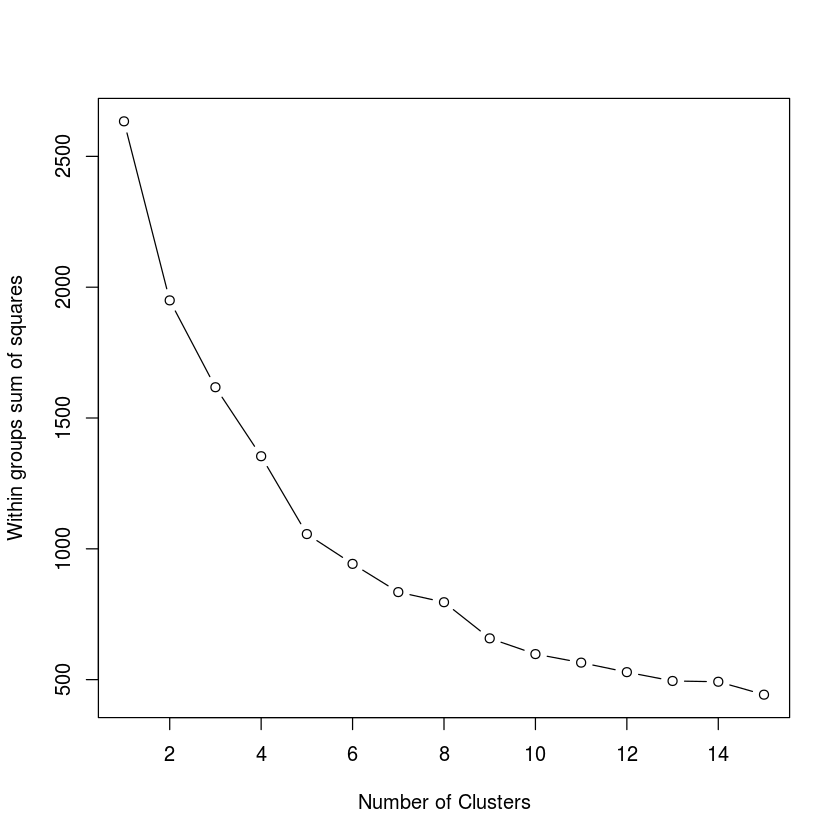

In [9]:
wss <- (nrow(customer1)-1)*sum(apply(customer1,2,var))
for (i in 2:15) wss[i] <- sum(kmeans(customer1, 
  	centers=i)$withinss)
plot(1:15, wss, type="b", xlab="Number of Clusters",
  ylab="Within groups sum of squares")

#### Fitting the Model

In [10]:
fit <- kmeans(customer1, 6) # fit the model
aggregate(customer1,by=list(fit$cluster),FUN=mean) # get cluster means
customer1 <- data.frame(customer1, fit$cluster) #append cluster assignment

Group.1,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,1.8346505,-0.1958999,-0.2006126,0.135965520,-0.36496522,0.32092806
2,0.3134735,3.9174467,4.2707490,-0.003570131,4.61291490,0.50279301
3,0.2465068,-0.2767529,-0.4271843,1.617476119,-0.50080559,-0.01786119
4,-0.5418295,0.6533997,0.9130081,-0.339982033,0.92379447,0.02975198
5,3.1644391,3.5092697,1.1090489,5.510889477,-0.03827575,6.42932569
6,-0.2844206,-0.3839533,-0.4327885,-0.256292619,-0.38530364,-0.20316136


#### Results plots using clusplot function

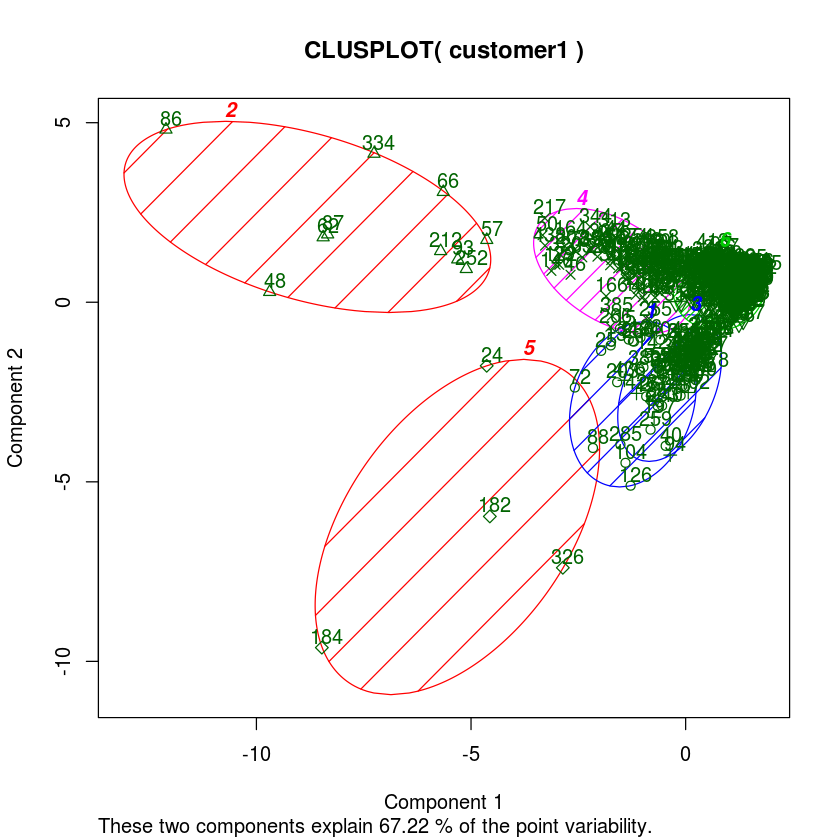

In [11]:
library(cluster) # Using R cluster library
clusplot(customer1, fit$cluster, color=TRUE, shade=TRUE, labels=2, lines=0)

#### K-means helping to find outlier detection

In [12]:
# data are partitioned into k groups by assigning them to the closest cluster centers
customer2 <- customer[, 3:8]
kmeans.result <- kmeans(customer2, centers=6)
kmeans.result$centers

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
1,46518.000,3438.682,4785.091,5249.955,801.0455,2147.227
2,20996.317,3826.433,5098.087,4157.010,1119.9423,1679.712
3,20031.286,38084.000,56126.143,2564.571,27644.5714,2548.143
4,5076.654,12288.526,18814.526,1605.000,8254.3974,1830.513
5,5996.482,3368.597,4206.765,2418.283,1282.9469,1001.305
6,60571.667,30120.333,17314.667,38049.333,2153.0000,20700.667


In [15]:
# calculate the distance between each object and its cluster center, and pick those with largest distances as outliers.
#kmeans.result$cluster # print out cluster IDs 
centers <- kmeans.result$centers[kmeans.result$cluster, ]
distances <- sqrt(rowSums((customer2 - centers)^2)) # calculate distances
outliers <- order(distances, decreasing=T)[1:5] # pick up top 5 distances
print(outliers)

[1] 182  87 326  86 184


In [17]:
print(customer2[outliers,]) #printing out the details of the outliers


     Fresh  Milk Grocery Frozen Detergents_Paper Delicassen
182 112151 29627   18148  16745             4948       8550
87   22925 73498   32114    987            20070        903
326  32717 16784   13626  60869             1272       5609
86   16117 46197   92780   1026            40827       2944
184  36847 43950   20170  36534              239      47943


# Hierarchial Clustering

1) 40 samples are considered for this clustering to avoid overcrowding
2) "Channel" and "Region" are dropped

In [18]:
idx <- sample(1:dim(customer)[1], 40)
customerSample <- customer[idx,]
customerSample$Region <- NULL
customerSample$Channel <- NULL

##### Implmented Wards approach for hierarchial clustering

The "ward" method has been renamed to "ward.D"; note new "ward.D2"


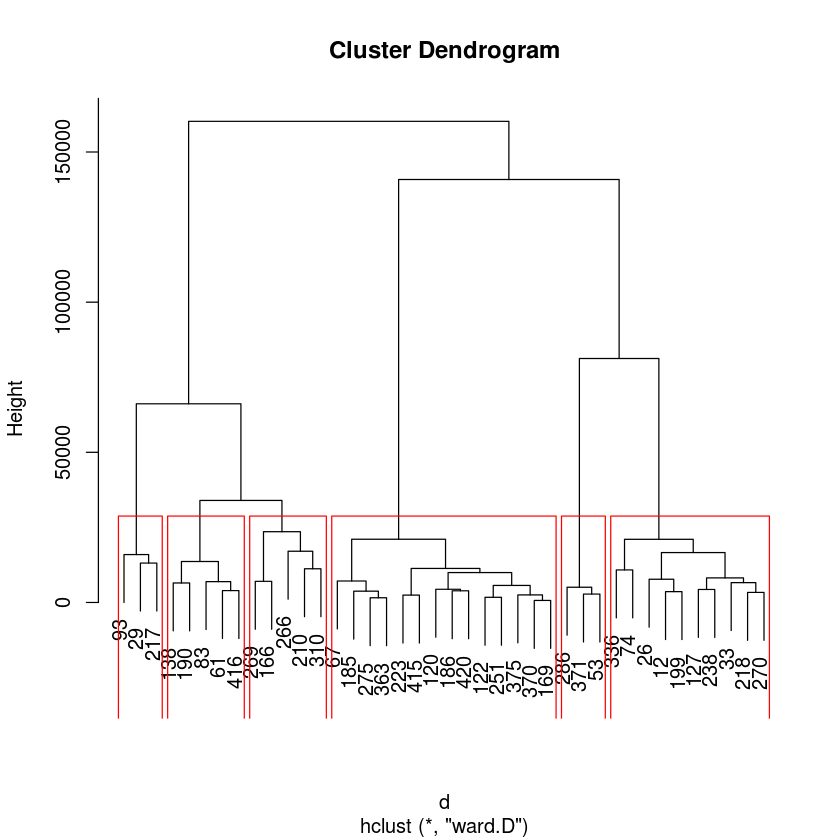

In [19]:
d <- dist(customerSample, method = "euclidean") # distance matrix
fit <- hclust(d, method="ward") 
plot(fit) # display dendogram
groups <- cutree(fit, k=6) # cut tree into 6 clusters
# draw dendogram with red borders around the 6 clusters 
rect.hclust(fit, k=6, border="red")


#### Interpretation

Each of the 40 data samples are assigned to separate clusters, 

Two closest clusters are then merged till there is just one cluster at the top. 

The height in the dendrogram at which two clusters are merged represents the distance between
two clusters in the data space. 

The decision of the number of clusters that can best depict different groups can be chosen by 
observing the dendrogram.